In [15]:
"""

GOAL : GROUP CUSTOMERS INTO SEGMENTS BASED ON THEIR PURCHASING BEHAVIOR

"""


'\n\nGOAL : GROUP CUSTOMERS INTO SEGMENTS BASED ON THEIR PURCHASING BEHAVIOR\n\n'

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sns.set_style('darkgrid')

In [17]:
data_set_location  = 'data/'

In [18]:

departments_df = pd.read_csv(data_set_location + 'departments.csv')
aisles_df = pd.read_csv(data_set_location + 'aisles.csv')


orders_df = pd.read_csv(data_set_location + 'orders.csv')
product_df = pd.read_csv(data_set_location + 'products.csv')

order_products_train_df = pd.read_csv(data_set_location + 'order_products__train.csv')
order_products_prior_df = pd.read_csv(data_set_location + 'order_products__prior.csv')

# Merge data into single dataframe

In [19]:
df = order_products_prior_df.copy()

print("before merge" , df.shape)

df =  pd.merge(df, product_df, on='product_id', how='left')
df = pd.merge(df, aisles_df, on='aisle_id', how='left')
df = pd.merge(df, departments_df, on='department_id', how='left')
df = pd.merge(df, orders_df, on='order_id', how='left')

print("after merge" , df.shape)


before merge (32434489, 4)
after merge (32434489, 15)


In [20]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [21]:
print( "Total number of customers :" ,  len( df.user_id.unique() ) )

Total number of customers : 206209


# Let's understand and group customers by the products they order

In [22]:
df_cross = pd.crosstab(df.user_id ,  df.aisle , normalize='index')

df_cross.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.016949,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.016949
2,0.0,0.015385,0.0,0.0,0.0,0.0,0.010256,0.0,0.0,0.0,...,0.015385,0.005128,0.005128,0.000000,0.0,0.0,0.0,0.010256,0.0,0.215385
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.045455,0.011364,0.000000,0.000000,0.0,0.0,0.0,0.022727,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.055556,0.0,0.0,0.0,0.055556,0.0,0.000000
5,0.0,0.054054,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.081081


In [23]:
df_pca = PCA(n_components=10).fit_transform(df_cross)

df_pca =  pd.DataFrame(df_pca)

df_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.113443,0.039084,-0.042863,0.018865,-0.088341,-0.104549,-0.116443,0.083694,-0.062523,-0.026177
1,-0.036988,0.108884,-0.066406,-0.123271,0.098849,-0.033960,-0.054736,-0.053366,-0.020370,-0.008092
2,0.064282,0.103962,0.000710,-0.012221,-0.046984,0.112238,-0.029812,0.007860,0.012277,0.001852
3,-0.093210,0.054093,0.001867,-0.003974,-0.071356,-0.019278,-0.025115,-0.038234,0.006492,-0.000623
4,0.094629,-0.037051,-0.024952,-0.021575,0.055369,0.107649,-0.008034,0.103931,0.051732,-0.025799


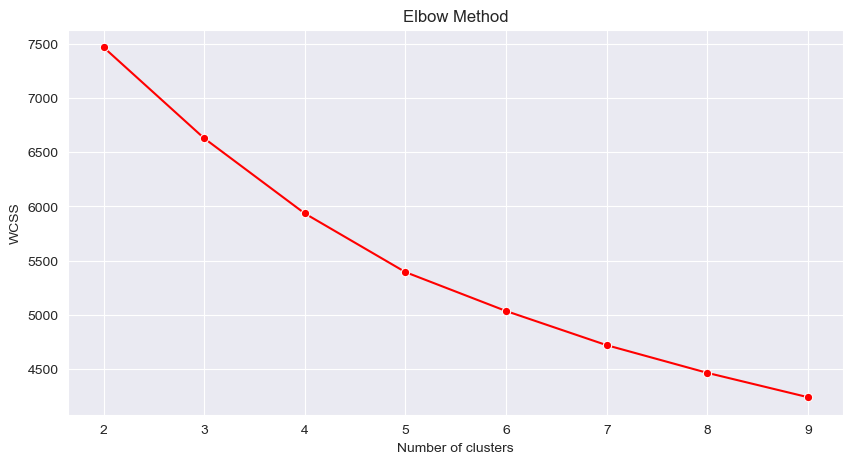

In [24]:
"""

To determine best K value for KMeans clustering, we will use the Elbow method .

The elbow method looks for the point in which the graph starts to bend and level off, this point is the optimal number of clusters.

"""

wcss = []
max_clusters = 10

for i in range(2, max_clusters):
    kmeans = KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

fig ,  axis = plt.subplots(1,1, figsize=(10,5))
axis= sns.lineplot(x = range(2, max_clusters), y = wcss, marker='o', color='red')
axis.set_title('Elbow Method')
axis.set_xlabel('Number of clusters')
axis.set_ylabel('WCSS')

fig.savefig('img/elbow_method.png')

In [25]:
"""

Optimal number of clusters is 5

"""


kmeans = KMeans(n_clusters= 5, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(df_pca)

relative_center_of_clusters = kmeans.cluster_centers_

cluster_labels = kmeans.labels_ # predict should be used on new dataset

In [26]:
df_with_clusters = df_pca.loc[: , [0,1]]
df_with_clusters.columns = ['x', 'y']
df_with_clusters['cluster'] = cluster_labels

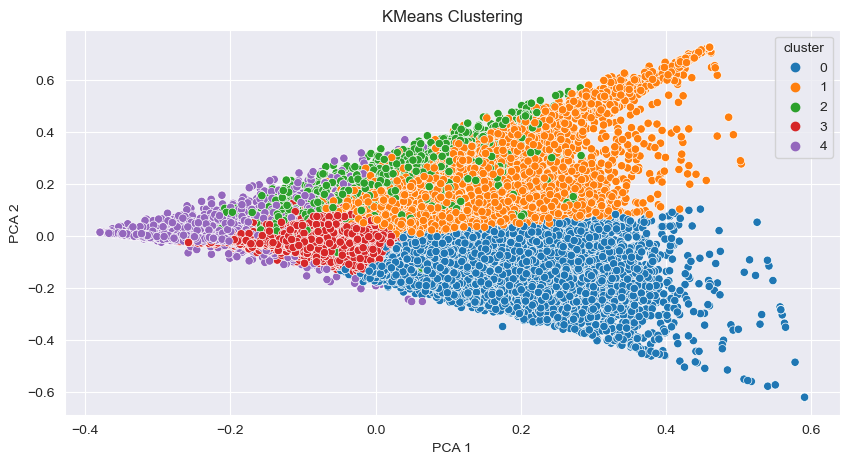

In [27]:
fig , axis = plt.subplots(1,1, figsize=(10,5))

axis = sns.scatterplot(x='x', y='y', hue='cluster', data=df_with_clusters, palette='tab10')
axis.set_title('KMeans Clustering')
axis.set_xlabel('PCA 1')
axis.set_ylabel('PCA 2')

fig.savefig('img/kmeans_clustering.png')



206209
Cluster  0  :  55658
Cluster  1  :  38295
Cluster  2  :  7959
Cluster  3  :  98980
Cluster  4  :  5317


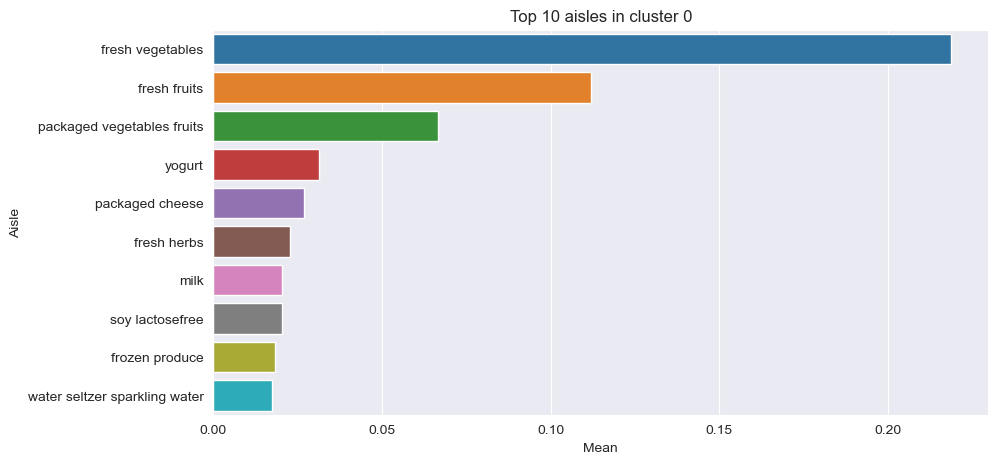

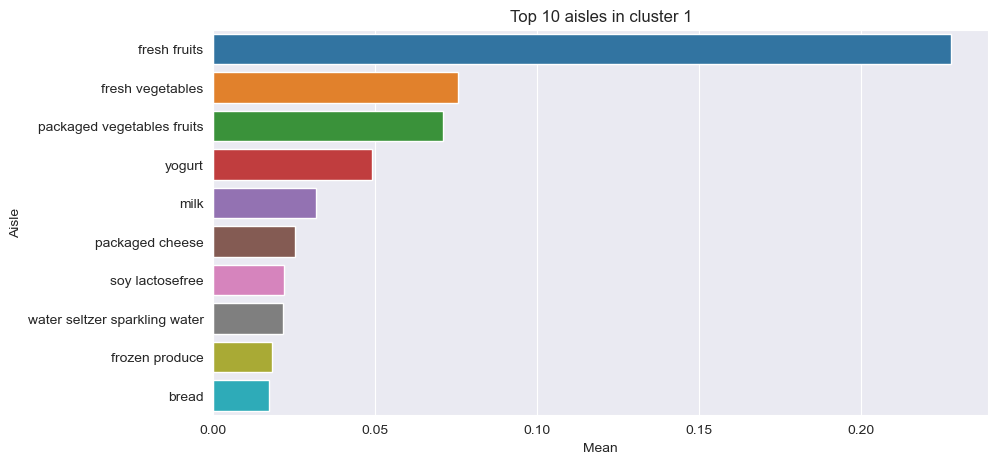

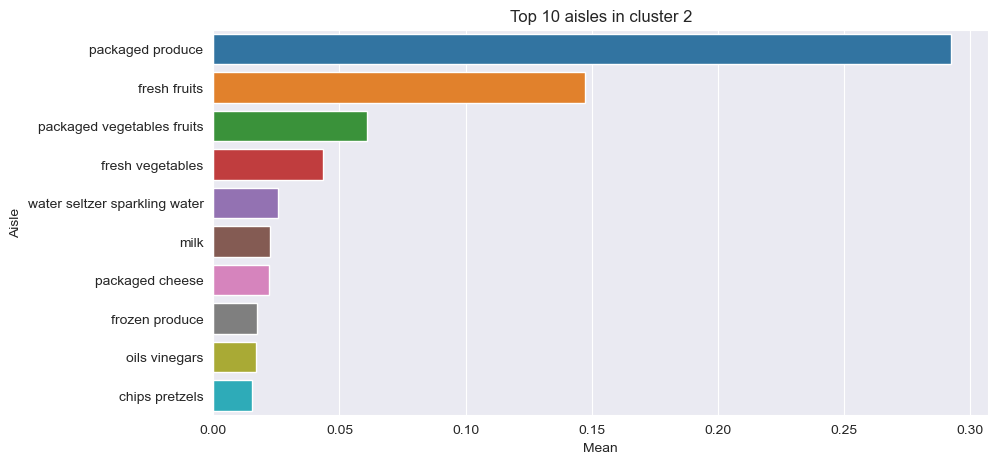

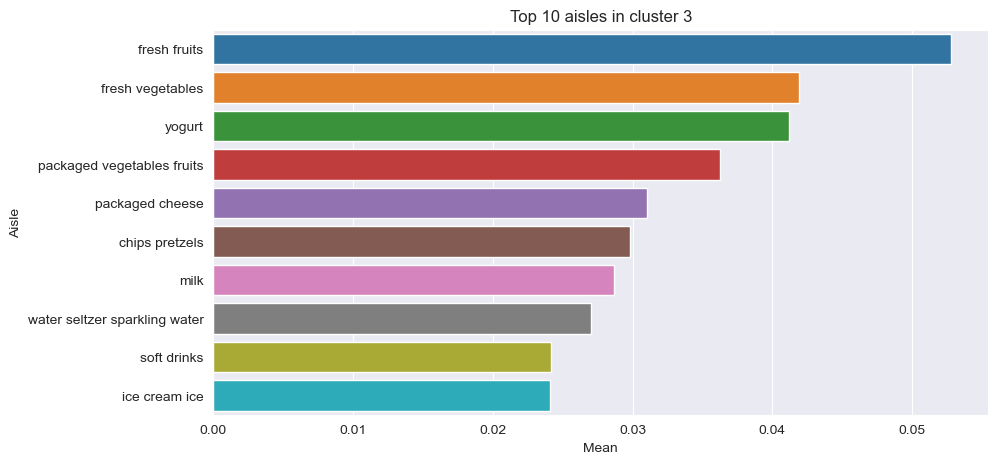

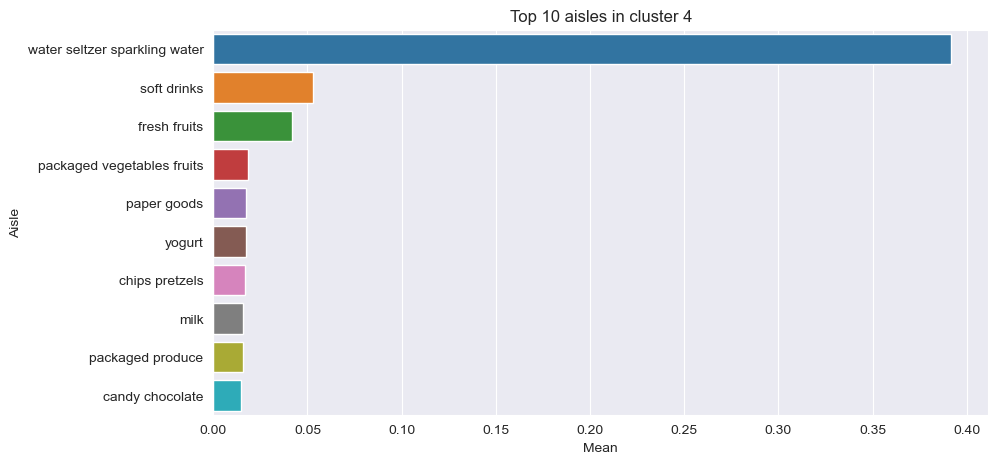

In [28]:
print( len(cluster_labels ) )

df_cross['cluster'] = cluster_labels


for i in range(5):
    print( "Cluster ", i , " : " , len(df_cross[df_cross['cluster'] == i]) )

    curr_cluster = df_cross[df_cross['cluster'] == i]
    curr_cluster = curr_cluster.drop(columns=['cluster'])

    curr_cluster = curr_cluster.mean().sort_values(ascending=False)[:10]

    # top 10 aisles in cluster
    fig , axis = plt.subplots(1,1, figsize=(10,5))
    axis = sns.barplot(x=curr_cluster.values, y=curr_cluster.index)
    axis.set_title('Top 10 aisles in cluster ' + str(i))
    axis.set_xlabel('Mean')
    axis.set_ylabel('Aisle')
    fig.savefig('img/cluster_' + str(i) + '.png')